# 데이터 수집

In [108]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import mplfinance as mpf
import matplotlib.dates as mdates
import pandas as pd

In [109]:
# 주식 날자, 시가, 고가, 저가, 종가, 거래량, 변화률 데이터 가져오기.

# 가져올 데이터 설정.
stock_codes = ['005930', '035420', '035720']
stock_dates_start = ['2010-07-10', '2010-07-10', '2010-07-10']
stock_dates_end = ['2021-06-30', '2021-06-30', '2021-06-30']

# 데이터 가져오기.
stock_data_arr = [fdr.DataReader(stock_codes[i], stock_dates_start[i], stock_dates_end[i]) for i in range(3)]
print(type(stock_data_arr[0]))
print(stock_data_arr[0].index)
# 확인.
for data in stock_data_arr:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', name='Date', length=2707, freq=None)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-07-12 to 2021-06-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2707 non-null   int64  
 1   High    2707 non-null   int64  
 2   Low     2707 non-null   int64  
 3   Close   2707 non-null   int64  
 4   Volume  2707 non-null   int64  
 5   Change  2707 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 148.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-07-12 to 2021-06-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2707 non-null   int64  
 1   High    2707 non-null   int64  
 2   Low     2707 non-null   int64  
 3   Close   2707 non-null   int64  
 4   Volume  2707 non-null   int64  
 5   Change  2707 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 148.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-07-12 to 2021-06-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2707 non-null   int64  
 1   High    2707 non-null   int64  
 2   Low     2707 non-null   int64  
 3   Close   2707 non-null   int64  
 4   Volume  2707 non-null   int64  
 5   Change  2707 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 148.0 KB


None

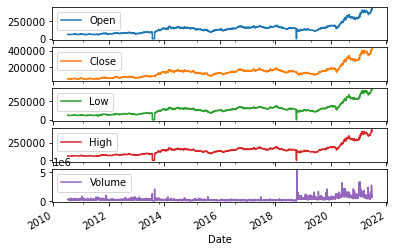

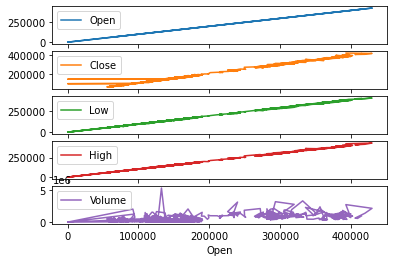

In [110]:
plot_cols = ['Open', 'Close', 'Low', "High", "Volume"]
plot_features = stock_data_arr[1][plot_cols]
  
_ = plot_features.plot(subplots=True)

plot_features = stock_data_arr[1][plot_cols]
plot_features.index = stock_data_arr[1]["Open"]
_ = plot_features.plot(subplots=True)

# 전처리

In [111]:
# 최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환.
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [112]:
for i in range(len(stock_data_arr)):
    stock_data_arr[i] = MinMaxScaler(stock_data_arr[i])

display(stock_data_arr[0])

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-07-12,0.176966,0.165702,0.176983,0.031525,0.002791,0.474945
2010-07-13,0.176744,0.166942,0.177430,0.029974,0.003402,0.393789
2010-07-14,0.180066,0.171074,0.181676,0.037209,0.007354,0.624290
2010-07-15,0.182724,0.170455,0.182793,0.036176,0.003560,0.407984
2010-07-16,0.180731,0.169421,0.179218,0.031525,0.003752,0.315600
...,...,...,...,...,...,...
2021-06-24,0.890365,0.840909,0.894972,0.873385,0.207860,0.508421
2021-06-25,0.902547,0.846074,0.907263,0.878553,0.149286,0.460833
2021-06-28,0.904762,0.847107,0.911732,0.882429,0.128214,0.454081


In [117]:
train_size = int(len(stock_data_arr[0]) * 0.7)
test_size = len(stock_data_arr[0]) - train_size

# 종목 데이터 배열
# # 훈련용 데이터셋 70%
# train_x_arr = np.array([np.array(np.array(stock_data_arr[i][0 : train_size])) for i in range(len(stock_data_arr))])
# train_y_arr = np.array([np.array(stock_data_arr[i][0 : train_size]) for i in range(len(stock_data_arr))])
# print(train_x_arr)

# # 테스트용 데이터셋 30%
# test_x_arr = np.array([np.array(stock_data_arr[i][train_size : len(stock_data_arr[0])]) for i in range(len(stock_data_arr))])
# test_y_arr = np.array([np.array(stock_data_arr[i][train_size : len(stock_data_arr[0])]) for i in range(len(stock_data_arr))])
# print(test_x_arr)

x = stock_data_arr[0].values.tolist()
y = stock_data_arr[0].values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

# 훈련용 데이터셋 70%
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])
# 테스트용 데이터셋 30%
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

[[0.9025470653367635, 0.8460743801644152, 0.9061452513956356, 0.8811369509032544, 0.1660999889298822, 0.4943285608170154], [0.8981173864884849, 0.8398760330569836, 0.9016759776526239, 0.8695090439265252, 0.15510993229178535, 0.37476238332534506], [0.8981173864884849, 0.8378099173545064, 0.8994413407811179, 0.8643410852702011, 0.16517940959896887, 0.40749753360630575], [0.8826135105195099, 0.8264462809908818, 0.8893854748593415, 0.856589147285715, 0.17787642588391248, 0.39393977933374924], [0.8881506090798581, 0.8295454545445976, 0.8927374301666002, 0.8578811369497961, 0.13037164667041531, 0.4409776784006539], [0.891472868216067, 0.8326446280983134, 0.8927374301666002, 0.859173126613877, 0.15343964787702158, 0.44096922476858774], [0.8903654485039973, 0.8409090909082222, 0.8949720670381062, 0.8733850129187682, 0.2078604213308684, 0.5084209872057701], [0.9025470653367635, 0.8460743801644152, 0.9072625698313885, 0.8785529715750923, 0.1492855245106875, 0.46083330287821245], [0.9047619047609

# 학습

In [118]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt

[[0.9025470653367635, 0.8460743801644152, 0.9061452513956356, 0.1660999889298822, 0.8281979458434581], [0.8981173864884849, 0.8398760330569836, 0.9016759776526239, 0.15510993229178535, 0.8113912231544138], [0.8981173864884849, 0.8378099173545064, 0.8994413407811179, 0.16517940959896887, 0.8039215686259498], [0.8826135105195099, 0.8264462809908818, 0.8893854748593415, 0.17787642588391248, 0.7927170868332536], [0.8881506090798581, 0.8295454545445976, 0.8927374301666002, 0.13037164667041531, 0.7945845004653695], [0.891472868216067, 0.8326446280983134, 0.8927374301666002, 0.15343964787702158, 0.7964519140974856], [0.8903654485039973, 0.8409090909082222, 0.8949720670381062, 0.2078604213308684, 0.8169934640507619], [0.9025470653367635, 0.8460743801644152, 0.9072625698313885, 0.1492855245106875, 0.824463118579226], [0.9047619047609028, 0.8471074380156538, 0.9117318435744003, 0.12821414198499387, 0.8300653594755741], [0.9069767441850421, 0.8481404958668924, 0.9027932960883768, 0.17434374395009

676/676 [==============================] - 0s 621us/sample - loss: 0.0014 - accuracy: 0.0015
Epoch 59/200
676/676 [==============================] - 0s 657us/sample - loss: 0.0016 - accuracy: 0.0015
Epoch 60/200
676/676 [==============================] - 0s 650us/sample - loss: 0.0014 - accuracy: 0.0015
Epoch 61/200
676/676 [==============================] - 0s 703us/sample - loss: 0.0016 - accuracy: 0.0015
Epoch 62/200
676/676 [==============================] - 0s 672us/sample - loss: 0.0015 - accuracy: 0.0015
Epoch 63/200
676/676 [==============================] - 0s 661us/sample - loss: 0.0015 - accuracy: 0.0015
Epoch 64/200
676/676 [==============================] - 0s 673us/sample - loss: 0.0016 - accuracy: 0.0015
Epoch 65/200
676/676 [==============================] - 0s 702us/sample - loss: 0.0014 - accuracy: 0.0015
Epoch 66/200
676/676 [==============================] - 0s 688us/sample - loss: 0.0015 - accuracy: 0.0015
Epoch 67/200
676/676 [==============================] - 1s 

676/676 [==============================] - 0s 669us/sample - loss: 0.0012 - accuracy: 0.0015
Epoch 136/200
676/676 [==============================] - 0s 698us/sample - loss: 0.0013 - accuracy: 0.0015
Epoch 137/200
676/676 [==============================] - 0s 641us/sample - loss: 0.0013 - accuracy: 0.0015
Epoch 138/200
676/676 [==============================] - 0s 685us/sample - loss: 0.0012 - accuracy: 0.0015
Epoch 139/200
676/676 [==============================] - 0s 679us/sample - loss: 0.0012 - accuracy: 0.0015
Epoch 140/200
676/676 [==============================] - 0s 691us/sample - loss: 0.0012 - accuracy: 0.0015
Epoch 141/200
676/676 [==============================] - 0s 670us/sample - loss: 0.0013 - accuracy: 0.0015
Epoch 142/200
676/676 [==============================] - 0s 684us/sample - loss: 0.0014 - accuracy: 0.0015
Epoch 143/200
676/676 [==============================] - 0s 667us/sample - loss: 0.0013 - accuracy: 0.0015
Epoch 144/200
676/676 [============================

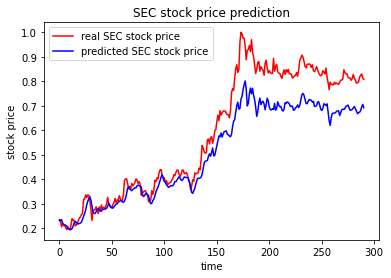

Tomorrow's SEC price : [69167.32357864] KRW


In [122]:
window_size = 10 
data_size = 5

raw_df = fdr.DataReader('005930', '2017-07-10', '2021-06-30')

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

# 훈련용 데이터셋 70%
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])
# 테스트용 데이터셋 30%
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=200, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')
